In [1]:
%matplotlib inline
import sys
from pathlib import Path
import numpy as np
from astropy import table
from astropy import units as u
from scipy import interpolate, integrate, special
from matplotlib import colors
from tqdm.notebook import tqdm

import betterplotlib as bpl
bpl.set_style()

In [2]:
sys.path.append("/Users/gillenb/code/legus_sizes/analysis/mass_radius_relation")
from mass_radius_utils_mcmc_fitting import selection_probability, selection_r, selection_v

  1%|          | 2/200 [00:00<00:10, 18.36it/s]

precalculating V selection function with V_cut = -6


  6%|▌         | 86/1500 [00:00<00:01, 856.69it/s]

precalculating radius selection function


100%|██████████| 1500/1500 [00:04<00:00, 350.83it/s]


# Testing happens down here

In [11]:
d_log_m = 0.1
d_log_t = 0.1
d_log_r = 0.1
log_m_grid = np.arange(1, 6, d_log_m)
log_t_grid = np.arange(6, 10, d_log_t)
log_r_grid = np.arange(-2, 2, d_log_r)

In [12]:
mt_grid_m = np.zeros(log_m_grid.size * log_t_grid.size)
mt_grid_t = np.zeros(log_m_grid.size * log_t_grid.size)
idx = 0
for log_m in log_m_grid:
    for log_t in log_t_grid:
        mt_grid_m[idx] = log_m
        mt_grid_t[idx] = log_t
        idx += 1
        
fraction_v = selection_v(mt_grid_m, mt_grid_t).reshape((log_m_grid.size, log_t_grid.size))

In [13]:
# fraction_r = np.zeros(log_r_grid.size)

# for r_idx in tqdm(range(log_r_grid.size)):
#     fraction_r[r_idx] = selection_r(log_r_grid[r_idx])
#     fraction_r_raw[r_idx] = selection_r.r_selection(10**log_r_grid[r_idx])

test_dist = 16
fraction_r = selection_r(log_r_grid, test_dist)

radius_pc = 10**log_r_grid * u.pc
test_dist *= u.Mpc
radius_radians = (radius_pc / test_dist) * u.radian
radius_arcsec = radius_radians.to(u.arcsec).value

fraction_r_raw = selection_r.r_selection(radius_arcsec)

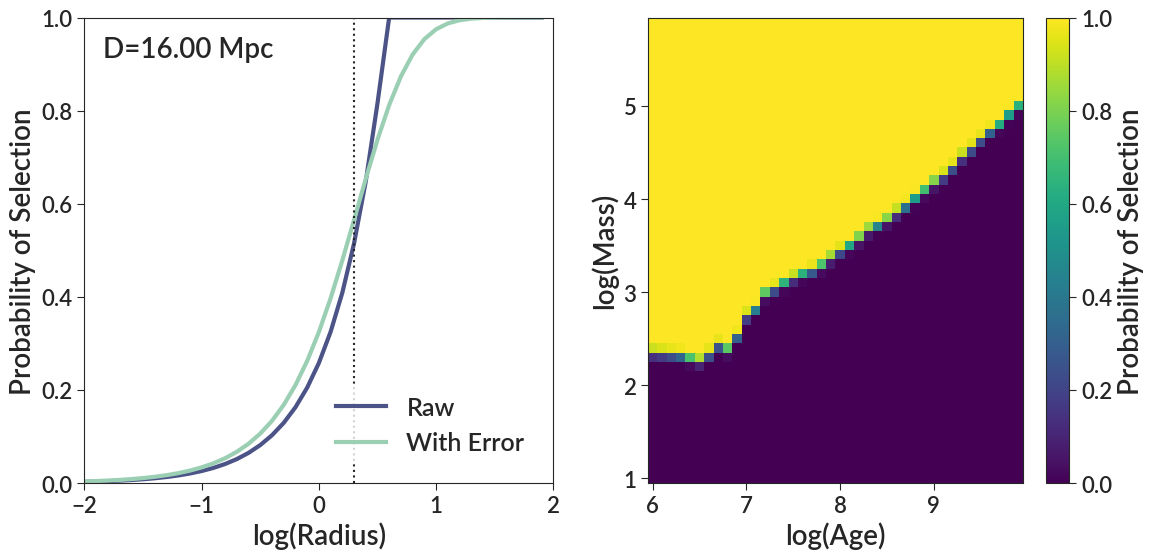

In [16]:
fig, axs = bpl.subplots(ncols=2, figsize=[12, 6])

axs[0].plot(log_r_grid, fraction_r_raw, label="Raw")
axs[0].plot(log_r_grid, fraction_r, label="With Error")
axs[0].add_labels("log(Radius)", "Probability of Selection")
axs[0].set_limits(-2, 2, 0, 1)
axs[0].legend(loc=4)
axs[0].axvline(np.log10(2), ls=":")
axs[0].easy_add_text(f"D={test_dist:.2f}", "upper left")


limits = (
    min(log_t_grid) - 0.5 * d_log_t,
    max(log_t_grid) + 0.5 * d_log_t,
    min(log_m_grid) - 0.5 * d_log_m,
    max(log_m_grid) + 0.5 * d_log_m,
)
im = axs[1].imshow(
    fraction_v,
    origin="lower",
#     norm=colors.LogNorm(),
    extent=limits,
    # This scalar aspect ratio is calculated to ensure the pixels are square
    aspect=((max(log_t_grid) - min(log_t_grid)) / log_t_grid.size) / ((max(log_m_grid) - min(log_m_grid)) / log_m_grid.size),
)

cbar = fig.colorbar(im, ax=axs[1])
cbar.set_label("Probability of Selection")

axs[1].set_limits(*limits)
axs[1].add_labels("log(Age)", "log(Mass)")
